In [23]:
import numpy as np

# TEST WITH IRIS


In [24]:
# # Read csv file
# import pandas as pd
# data = pd.read_csv('Iris.csv')
# data.head()

In [25]:
# change = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
# data['Species'] = data['Species'].map(change)
# data.head()

In [26]:
# import neural_network as nn
# import numpy as np

# # Create a neural network with 4 input neurons, 3 hidden neurons, and 3 output neuron
# mynetwork = nn.NeuralNetwork(4, 3)
# mynetwork.add_hidden_layer(4)
# mynetwork.create_weight_matrix()
# mynetwork.create_bias_matrix()

# # Split data into training and testing
# from sklearn.model_selection import train_test_split
# X = data.drop(['Species', 'Id'], axis=1)
# y = data['Species']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [27]:
# mynetwork.bias_matrix

In [28]:
# # Train the neural network
# y_0 = np.eye(3)[y_train.iloc[0]]
# x_0 = X_train.iloc[0]

# output_layer = mynetwork.feed_forward(x_0)
# print("Output Feedforward",output_layer)
# backprop_error = mynetwork.backpropagation(y_0, output_layer)

# TEST VECTORIZATION MODE


In [29]:
# Read csv file
import pandas as pd
data = pd.read_csv('Iris.csv')
data.head()

change = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data['Species'] = data['Species'].map(change)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [30]:
import neural_network as nn
import numpy as np

# Create a neural network with 4 input neurons, 3 hidden neurons, and 3 output neuron
myNN = nn.NeuralNetwork(4, 3)
myNN.add_hidden_layer(1)
myNN.init()

# Split data into training and testing
from sklearn.model_selection import train_test_split
X = data.drop(['Species', 'Id'], axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



----  Weight Matrix 0  ----
Shape:  (1, 4)
Size:  4
Dimension:  2
isNumpy:  True
Data:  [[-0.61041491 -0.80389307 -0.74593474 -0.41066789]]


----  Weight Matrix 1  ----
Shape:  (3, 1)
Size:  3
Dimension:  2
isNumpy:  True
Data:  [[ 0.34633766]
 [-0.75197527]
 [ 0.66248786]]


----  Bias Matrix 0  ----
Shape:  (1, 1)
Size:  1
Dimension:  2
isNumpy:  True
Data:  [[-0.87808516]]


----  Bias Matrix 1  ----
Shape:  (3, 1)
Size:  3
Dimension:  2
isNumpy:  True
Data:  [[ 0.43367882]
 [-0.01929199]
 [-0.08870164]]




In [31]:
output = myNN.feedforward_vectorization_mode(X_train.iloc[0])
myNN.print_info(output, "Output")

----  Output  ----
Shape:  (3, 1)
Size:  3
Dimension:  2
isNumpy:  True
Data:  [[0.4486637 ]
 [0.28523026]
 [0.26610604]]




In [32]:
# print("len of hidden layer", len(myNN.hidden_layer))
# for i in myNN.hidden_layer:
#     myNN.print_info(i, "hidden_layer")

In [33]:
myNN.backpropagation_vectorization_mode(myNN.one_hot_encode(y_train.iloc[0]), output)

ValueError: shapes (3,3) and (1,1) not aligned: 3 (dim 1) != 1 (dim 0)

In [ ]:
result = myNN.train_vectorization_mode(X_train.iloc[0], y_train.iloc[0], 1000, 0.001)

In [ ]:
#plot history into line chart
import matplotlib.pyplot as plt
plt.plot(result)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# make line graph for error
import matplotlib.pyplot as plt
# Generate epochs
epochs = range(1, len(result) + 1)
plt.plot(epochs, result)
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.show()

In [ ]:
output = myNN.feedforward_vectorization_mode(X_train.iloc[0])
myNN.print_info(output, "Output")

In [ ]:
# print("Output", output)
# print output in decimal 5 places
for i in output:
    # print("{:.5f}".format(i[0]))
    print(i)
print(np.argmax(output))
print(y_train.iloc[0]) 

In [ ]:
myNN.categorical_crossentropy_loss(myNN.one_hot_encode(y_train.iloc[0]),output)

In [ ]:
def categorical_crossentropy_loss(y_true, y_pred):
          # Calculate cross-entropy loss
            predict = np.clip(y_pred, 1e-15, 1 - 1e-15)
            loss = -np.sum(y_true * np.log(predict), axis=0)
            return loss

print(categorical_crossentropy_loss(y_train.iloc[0], output))

In [ ]:
a = np.array([[1, 2, 3],[1,2,3]])
b = np.array([[4, 5, 6]])

a1 = np.array([0., 0., 1.])
b1 = np.array([0.1, 0.5, 0.4])
entropy = -a1 * np.log(b1)
# dont sum the entropy
print(entropy)

# Test Batch


In [34]:
# Read csv file
import pandas as pd
data = pd.read_csv('Iris.csv')
data.head()

change = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data['Species'] = data['Species'].map(change)
data.head()


import neural_network as nn
import numpy as np

# Create a neural network with 4 input neurons, 3 hidden neurons, and 3 output neuron
myNN = nn.NeuralNetwork(4, 3)
myNN.add_hidden_layer(5)
myNN.init()

# Split data into training and testing
from sklearn.model_selection import train_test_split
X = data.drop(['Species', 'Id'], axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



----  Weight Matrix 0  ----
Shape:  (5, 4)
Size:  20
Dimension:  2
isNumpy:  True
Data:  [[-0.80140058 -0.68158601 -0.89728514 -0.23694965]
 [-0.57727885 -0.63164131 -0.93035559 -0.64534563]
 [-0.90757864 -0.72989073 -0.64342397 -0.05046119]
 [-0.71045893 -0.12362841 -0.79465212 -0.19533843]
 [-0.28993947 -0.0176691  -0.36496607 -0.89449736]]


----  Weight Matrix 1  ----
Shape:  (3, 5)
Size:  15
Dimension:  2
isNumpy:  True
Data:  [[-0.79252865 -0.1804482  -0.9995074  -0.55294106 -0.79404622]
 [-0.5668856  -0.1102801  -0.85209794 -0.38205412 -0.40747567]
 [-0.44531397 -0.67762231 -0.74506746 -0.54587704 -0.86427265]]


----  Bias Matrix 0  ----
Shape:  (5, 1)
Size:  5
Dimension:  2
isNumpy:  True
Data:  [[-0.00657169]
 [-0.41612417]
 [-0.7612816 ]
 [ 0.43578741]
 [-0.2202979 ]]


----  Bias Matrix 1  ----
Shape:  (3, 1)
Size:  3
Dimension:  2
isNumpy:  True
Data:  [[-0.1975523 ]
 [-0.6666229 ]
 [-0.91254399]]




In [35]:
# output = myNN.feedforward_vectorization_mode(X_train.iloc[0])
# myNN.backpropagation_2(myNN.one_hot_encode(y_train.iloc[0]), output)
history = myNN.train(X_train, y_train, 100, 0.001)


Epoch  0 Error:  3.5737542881275535
Epoch  1 Error:  3.573657157026181
Epoch  2 Error:  3.5735600941793
Epoch  3 Error:  3.573463099538222
Epoch  4 Error:  3.5733661730542887
Epoch  5 Error:  3.573269314678878
Epoch  6 Error:  3.5731725243634056
Epoch  7 Error:  3.5730758020593174
Epoch  8 Error:  3.5729791477181005
Epoch  9 Error:  3.5728825612912662
Epoch  10 Error:  3.572786042730367
Epoch  11 Error:  3.5726895919869928
Epoch  12 Error:  3.5725932090127643
Epoch  13 Error:  3.572496893759332
Epoch  14 Error:  3.5724006461783895
Epoch  15 Error:  3.572304466221659
Epoch  16 Error:  3.5722083538408977
Epoch  17 Error:  3.5721123089879017
Epoch  18 Error:  3.572016331614494
Epoch  19 Error:  3.5719204216725395
Epoch  20 Error:  3.5718245791139336
Epoch  21 Error:  3.571728803890602
Epoch  22 Error:  3.5716330959545157
Epoch  23 Error:  3.571537455257666
Epoch  24 Error:  3.571441881752089
Epoch  25 Error:  3.571346375389854
Epoch  26 Error:  3.571250936123058
Epoch  27 Error:  3.571155

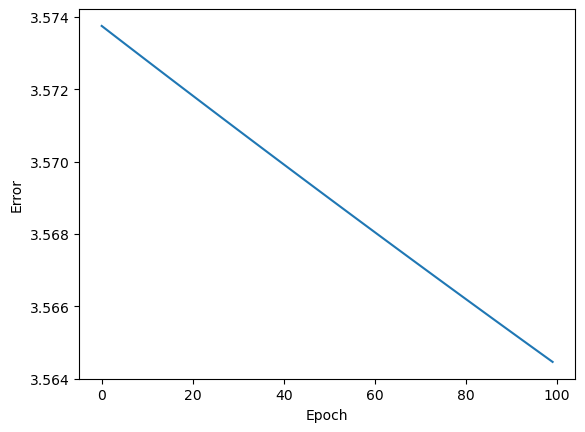

In [36]:
# plot history into line chart
import matplotlib.pyplot as plt
plt.plot(history)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [37]:
# create dataframe with 3 columns
import pandas as pd
df = pd.DataFrame(columns=['y_true', 'y_pred', 'is_correct'])

for i in range(X_train.shape[0]):
    output = myNN.feedforward_vectorization_mode(X_train.iloc[i])
    y_pred = np.argmax(output)
    y_true = y_train.iloc[i]
    is_correct = y_pred == y_true
    df = df.append({'y_true': y_true, 'y_pred': y_pred, 'is_correct': is_correct}, ignore_index=True)
df.head(10)    

C:\Users\fahre\AppData\Local\Temp\ipykernel_13384\3238602647.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'y_true': y_true, 'y_pred': y_pred, 'is_correct': is_correct}, ignore_index=True)
C:\Users\fahre\AppData\Local\Temp\ipykernel_13384\3238602647.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'y_true': y_true, 'y_pred': y_pred, 'is_correct': is_correct}, ignore_index=True)
C:\Users\fahre\AppData\Local\Temp\ipykernel_13384\3238602647.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'y_true': y_true, 'y_pred': y_pred, 'is_correct': is_correct}, ignore_index=True)
C:\Users\fahre\AppData\Local\Temp\ipykernel_13384\3238602647.py:10: FutureWarning: The frame.appe

,y_true,y_pred,is_correct
0,2,0,False
1,1,0,False
2,0,0,True
3,2,0,False
4,2,0,False
5,1,0,False
6,0,0,True
7,1,0,False
8,1,0,False
9,1,0,False


In [ ]:
# compute accuracy
accuracy = df['is_correct'].sum() / df.shape[0]
accuracy

0.36666666666666664

In [ ]:
myNN.hidden_layer

[array([[3.11802464e-05],
        [3.51160280e-06],
        [1.50212925e-04],
        [5.00656980e-06],
        [3.46431541e-04]]),
 array([[0.28039532],
        [0.32551116],
        [0.39409352]])]

In [ ]:
output = myNN.feedforward_vectorization_mode(X_train.iloc[1])
eror, dw2, db2, dw1, db1 = myNN.backpropagation_2(myNN.one_hot_encode(y_train.iloc[1]), output)

In [ ]:
dw1

array([[1.21123559, 0.67290866, 1.00936299, 0.33645433],
       [0.24161562, 0.1342309 , 0.20134635, 0.06711545],
       [0.45496028, 0.25275571, 0.37913357, 0.12637786],
       [0.73473981, 0.40818879, 0.61228318, 0.20409439],
       [0.4739569 , 0.26330939, 0.39496409, 0.1316547 ]])

In [ ]:
myNN.weight_matrix[0]

array([[-1.26267915, -1.00942718, -1.01780394, -0.748533  ],
       [-1.70594466, -0.72374448, -1.030703  , -1.13669352],
       [-0.95397912, -1.10490941, -0.75648184, -1.02888353],
       [-1.17291303, -1.26334327, -1.69255644, -0.32257359],
       [-1.03190045, -0.49665068, -1.2862687 , -0.37122136]])